In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
font = {'size': 16}
matplotlib.rc('font', **font)
matplotlib.rc('text',usetex=True)
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.4 installed at /Users/amkpd/Library/CloudStorage/OneDrive-SwanseaUniversity/Codes/QuintessenceAS/CAMB_Q/camb


### Testing $V(\Phi)=V_0 \exp(-\lambda \phi)$

EarlyQuintessence: lambda = 0.25, thetamc = 0.010440
Energy Densities: K = 0.000000, cdm = 0.270182, baryon = 0.048721, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679589, 
Sum of energy densities = 1.000000

EarlyQuintessence: lambda = 0.75, thetamc = 0.010480
Energy Densities: K = 0.000000, cdm = 0.270176, baryon = 0.048720, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679595, 
Sum of energy densities = 1.000000

EarlyQuintessence: lambda = 1.25, thetamc = 0.010579
Energy Densities: K = 0.000000, cdm = 0.270187, baryon = 0.048722, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679583, 
Sum of energy densities = 1.000000

EarlyQuintessence: lambda = 2, thetamc = 0.011101
Energy Densities: K = 0.000000, cdm = 0.270187, baryon = 0.048722, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.679583, 
Sum of energy densities = 1.000000

LCDM: thetamc = 0.011101
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, pho

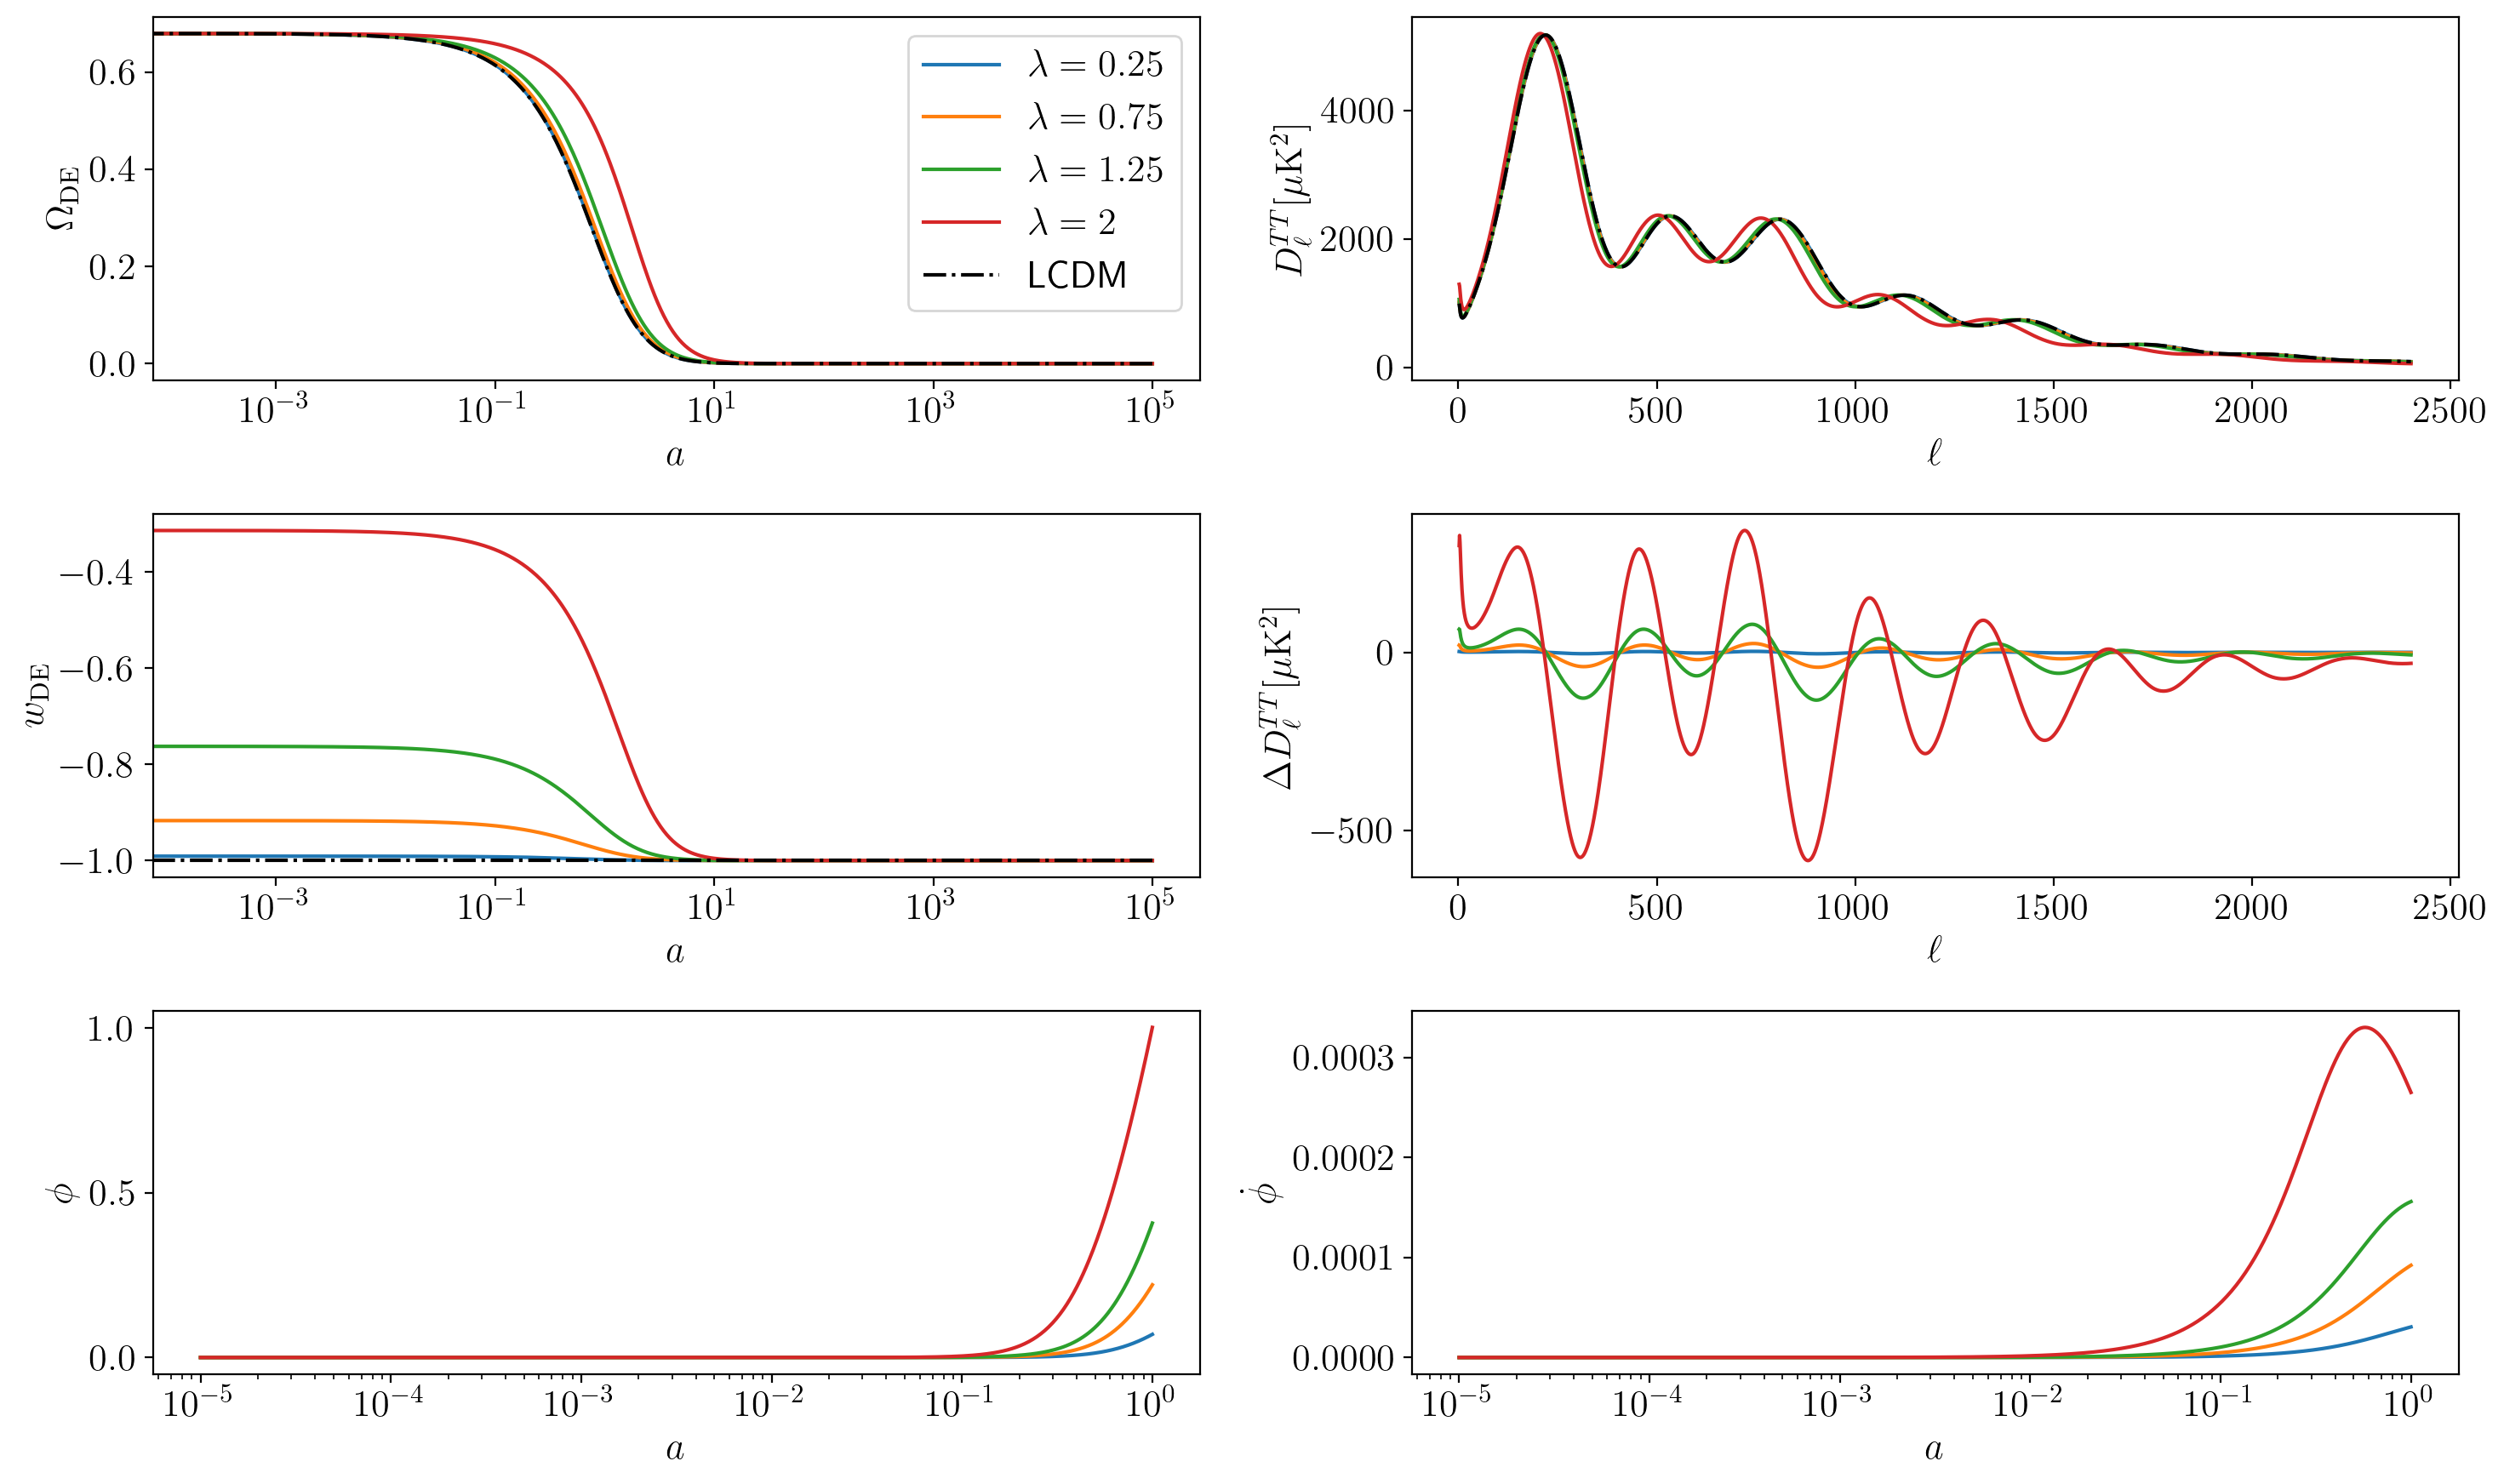

In [10]:
z1 = np.logspace(5,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))
scales = 1/(1+zs)

fig, ax = plt.subplots(3,2,figsize=(15,9))
ax[0,1].set_ylabel(r'$ D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_ylabel(r'$\Delta D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_xlabel(r'$\ell$')
ax[0,1].set_xlabel(r'$\ell$')
ax[0,0].set_ylabel(r'$\Omega_{\rm DE}$')
ax[1,0].set_ylabel(r'$w_{\rm DE}$')
ax[2,0].set_ylabel(r'$\phi$')
ax[0,0].set_xlabel(r'$a$')
ax[1,0].set_xlabel(r'$a$')
ax[2,0].set_xlabel(r'$a$')
ax[2,1].set_xlabel(r'$a$')
ax[2,1].set_ylabel(r'$\dot{\phi}$')

camb.set_feedback_level(level=0)
pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
results_LCDM = camb.get_results(pars);
cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
ls_LCDM = np.arange(cl_LCDM.shape[0])
ns = [0.25,0.75,1.25,2]
for n in ns:
    pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.,
                       n=n,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
    results = camb.get_results(pars);
    print(f'EarlyQuintessence: lambda = {n}, thetamc = {results.cosmomc_theta():.6f}')
    om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
    omega0 = []
    for param in om:
        omega0.append(results.get_Omega(param))
    omdict = dict(zip(om,omega0))
    print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
    print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
    wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
    ax[1,0].semilogx(zs,wde[:,1])
    ax[0,0].semilogx(zs,results.get_Omega('de',z=zs),label='$\\lambda=%s$'%n)
    cl = results.get_lensed_scalar_cls(CMB_unit='muK')
    ls = np.arange(0,cl.shape[0])
    ax[1,1].plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='$\\lambda=%s$'%n)
    ax[0,1].plot(ls[2:],cl[2:,0],label='$\\lambda=%s$'%n)
    ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
    ax[2,0].semilogx(scales,ev_phi[:,0],label=r'$\lambda=%s$'%n)
    ax[2,1].semilogx(scales,ev_phi[:,1]/scales,label=r'$\lambda=%s$'%n)

print(f'LCDM: thetamc = {results.cosmomc_theta():.6f}')
wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results_LCDM.get_Omega(param))
omdict = dict(zip(om,omega0))
print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
ax[0,1].plot(ls[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
ax[0,0].semilogx(zs,results_LCDM.get_Omega('de',z=zs),label=r'LCDM',color='k',ls='-.')
ax[1,0].semilogx(zs,wde[:,1],color='k',ls='-.')


ax[0,0].legend()
fig.tight_layout()

#### $\Omega_K = 0.05$

EarlyQuintessence: lambda = 0.25, thetamc = 0.009780
Energy Densities: K = 0.050004, cdm = 0.270180, baryon = 0.048721, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.629587, 
Sum of energy densities = 1.000000

EarlyQuintessence: lambda = 0.75, thetamc = 0.009815
Energy Densities: K = 0.050005, cdm = 0.270185, baryon = 0.048722, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.629580, 
Sum of energy densities = 1.000000

EarlyQuintessence: lambda = 1.25, thetamc = 0.009899
Energy Densities: K = 0.050004, cdm = 0.270179, baryon = 0.048721, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.629588, 
Sum of energy densities = 1.000000

EarlyQuintessence: lambda = 2, thetamc = 0.010295
Energy Densities: K = 0.050004, cdm = 0.270183, baryon = 0.048721, photon = 0.000055, neutrino = 0.000025, nu = 0.001428, de = 0.629583, 
Sum of energy densities = 1.000000

LCDM: thetamc = 0.010295
Energy Densities: K = 0.000000, cdm = 0.270160, baryon = 0.048717, pho

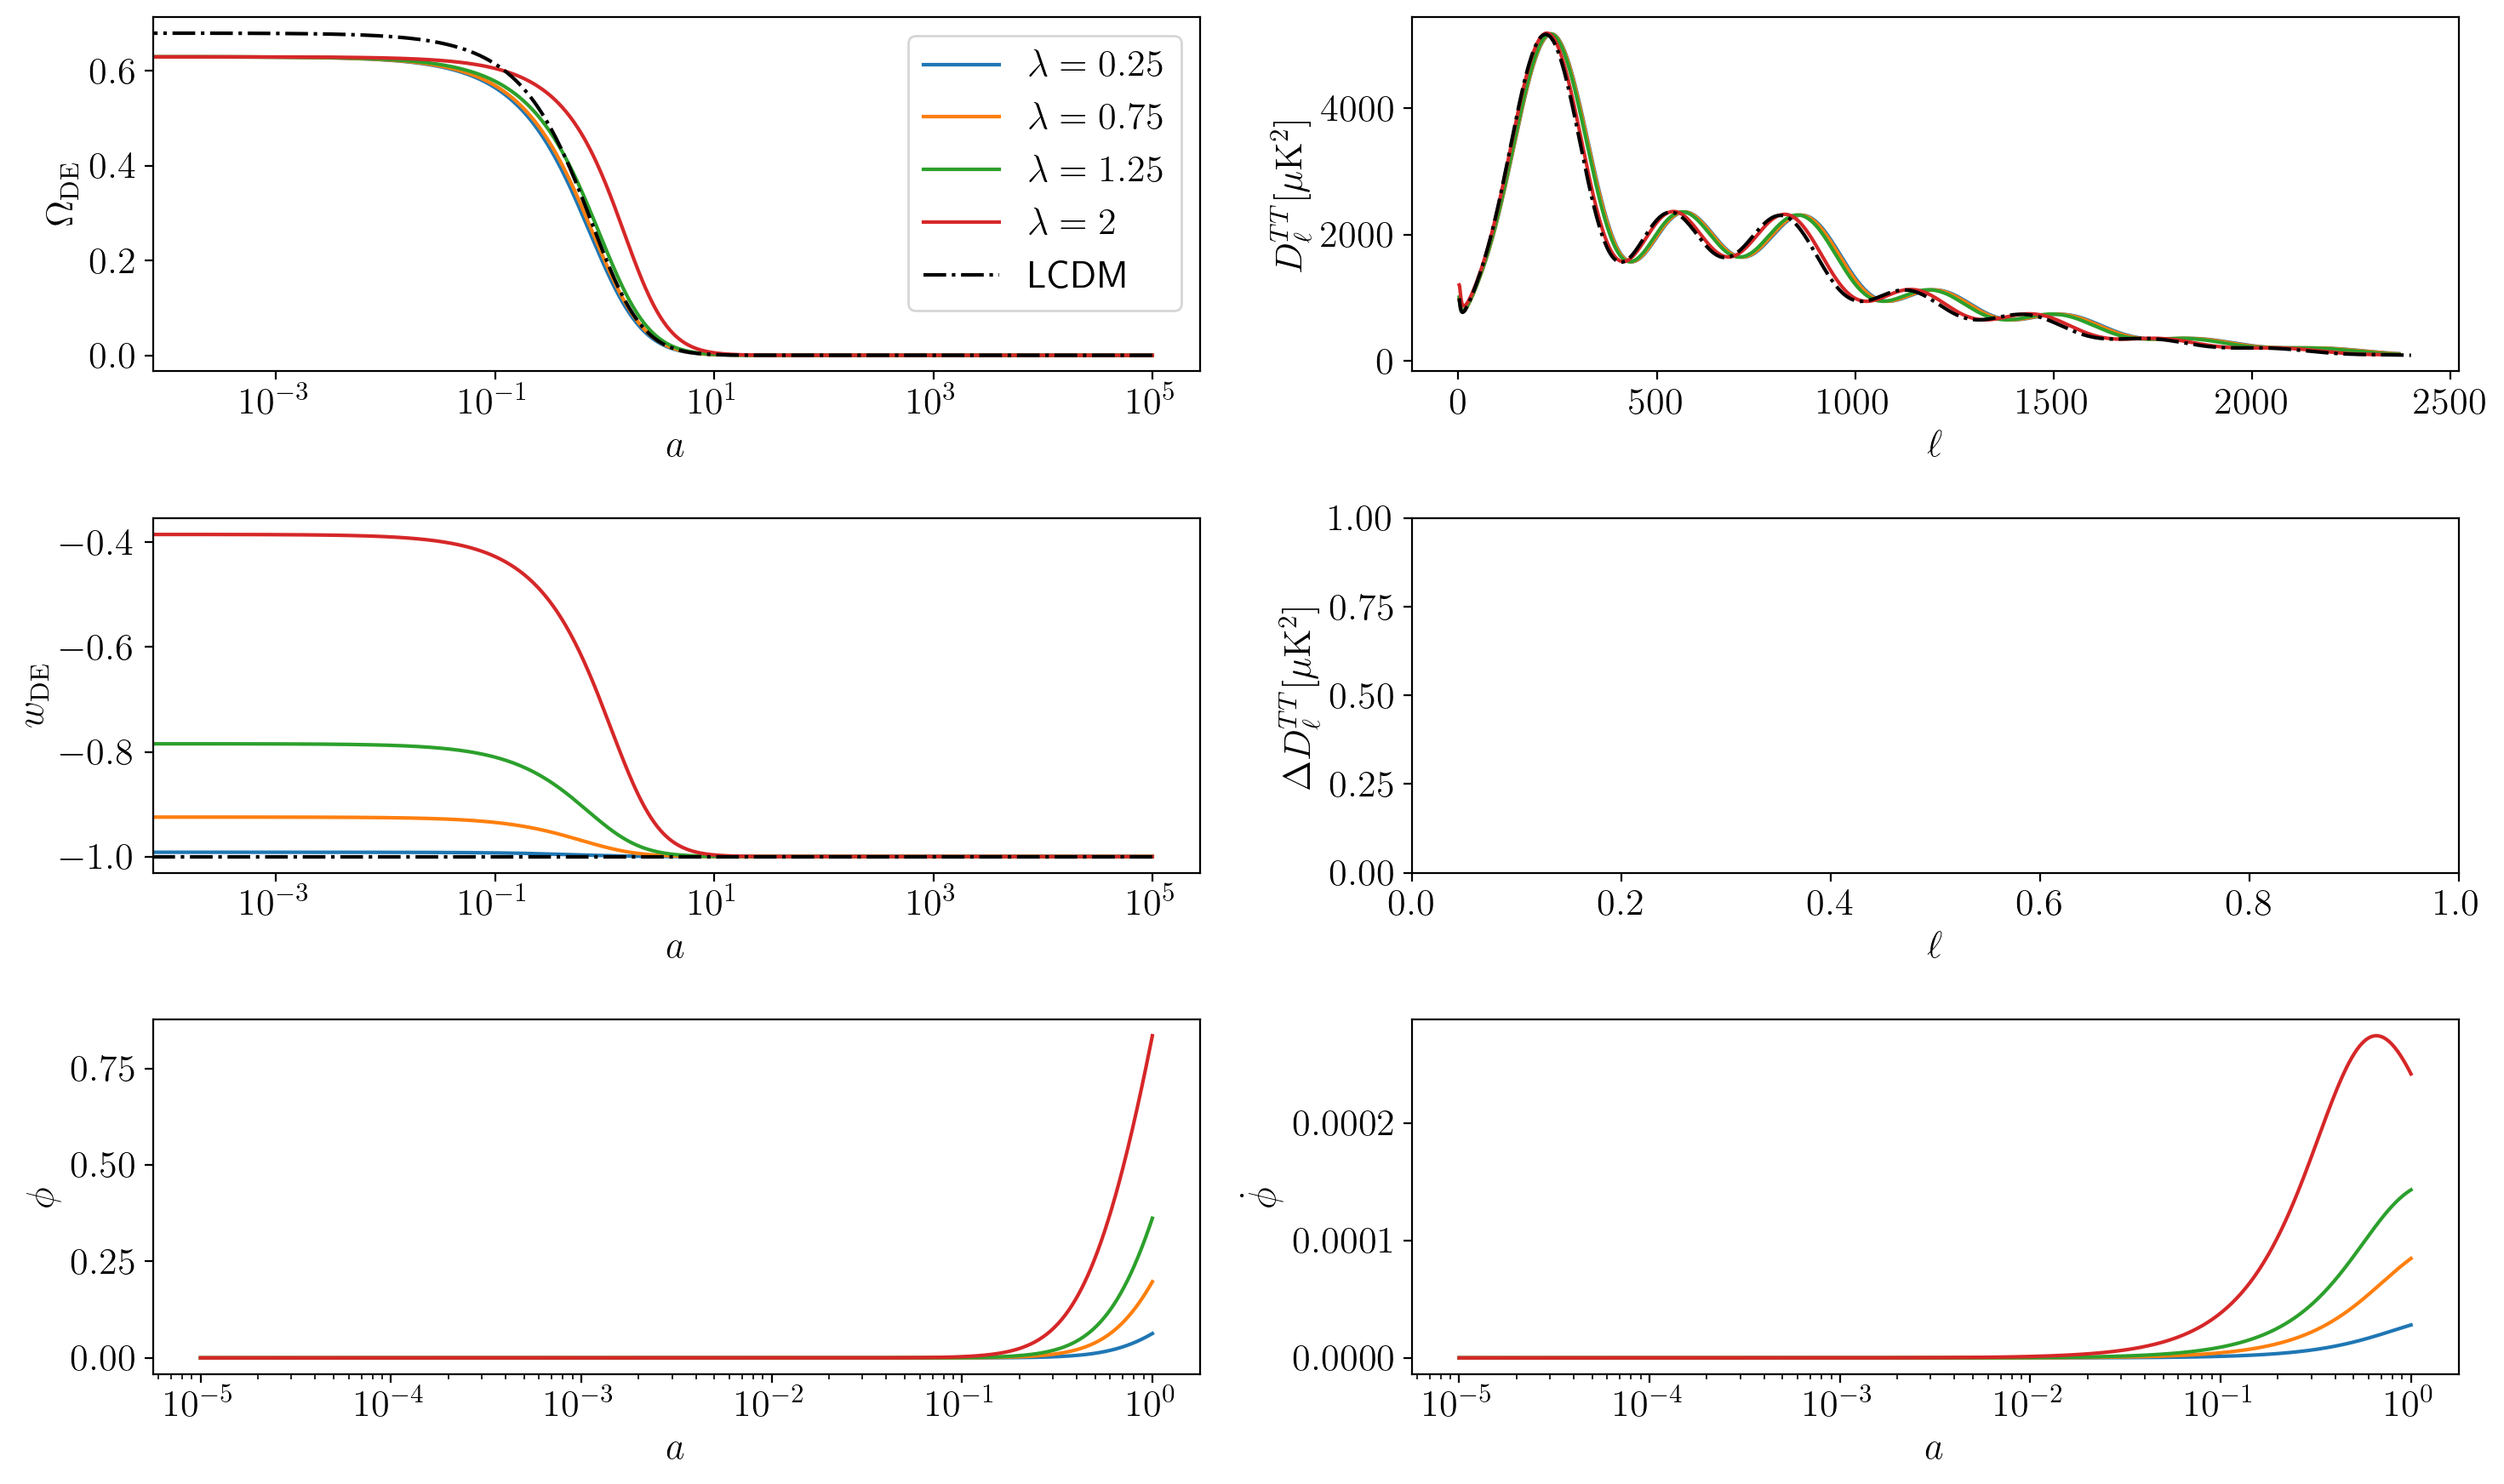

In [9]:
z1 = np.logspace(5,-2,500)
z2 = np.linspace(0.01,0.)
zs = np.concatenate((z1,z2))
scales = 1/(1+zs)

fig, ax = plt.subplots(3,2,figsize=(15,9))
ax[0,1].set_ylabel(r'$ D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_ylabel(r'$\Delta D_\ell^{TT} [\mu {\rm K}^2]$')
ax[1,1].set_xlabel(r'$\ell$')
ax[0,1].set_xlabel(r'$\ell$')
ax[0,0].set_ylabel(r'$\Omega_{\rm DE}$')
ax[1,0].set_ylabel(r'$w_{\rm DE}$')
ax[2,0].set_ylabel(r'$\phi$')
ax[0,0].set_xlabel(r'$a$')
ax[1,0].set_xlabel(r'$a$')
ax[2,0].set_xlabel(r'$a$')
ax[2,1].set_xlabel(r'$a$')
ax[2,1].set_ylabel(r'$\dot{\phi}$')

pars = camb.set_params( ombh2=0.022, omch2=0.122, H0=67.2)
results_LCDM = camb.get_results(pars)
cl_LCDM = results_LCDM.get_lensed_scalar_cls(CMB_unit='muK')
ls_LCDM = np.arange(cl_LCDM.shape[0])
ns = [0.25,0.75,1.25,2]
for n in ns:
    pars = camb.set_params(ombh2=0.022, omch2=0.122,  omk=0.05,
                       n=n,
                       dark_energy_model='EarlyQuintessenceAS', H0=67.2) 
    results = camb.get_results(pars)
    print(f'EarlyQuintessence: lambda = {n}, thetamc = {results.cosmomc_theta():.6f}')
    om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
    omega0 = []
    for param in om:
        omega0.append(results.get_Omega(param))
    omdict = dict(zip(om,omega0))
    print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
    print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
    wde = np.array(results.get_dark_energy_rho_w(1/(1+zs))).T
    ax[1,0].semilogx(zs,wde[:,1])
    ax[0,0].semilogx(zs,results.get_Omega('de',z=zs),label='$\\lambda=%s$'%n)
    cl = results.get_lensed_scalar_cls(CMB_unit='muK')
    ls = np.arange(0,cl.shape[0])
    # ax[1,1].plot(ls[2:],cl[2:,0]-cl_LCDM[2:,0],label='EarlyQ, $\\lambda=%s$'%n) # cant plot difference since arrays not same sized
    ax[0,1].plot(ls[2:],cl[2:,0],label='$\\lambda=%s$'%n)
    ev_phi = np.array(results.get_dark_energy_phi_phidot(1/(1+zs))).T
    ax[2,0].semilogx(scales,ev_phi[:,0],label=r'$\lambda=%s$'%n)
    ax[2,1].semilogx(scales,ev_phi[:,1]/scales,label=r'$\lambda=%s$'%n)

print(f'LCDM: thetamc = {results.cosmomc_theta():.6f}')
wde = np.array(results_LCDM.get_dark_energy_rho_w(1/(1+zs))).T
om = ['K', 'cdm', 'baryon', 'photon', 'neutrino' , 'nu', 'de']
omega0 = []
for param in om:
    omega0.append(results_LCDM.get_Omega(param))
omdict = dict(zip(om,omega0))
print("Energy Densities: "+"".join(f"{key} = {value:.6f}, " for key, value in omdict.items()))
print('Sum of energy densities = {:.6f}\n'.format(sum(omega0)))
ax[0,1].plot(ls_LCDM[2:],cl_LCDM[2:,0],label='LCDM',color='k',ls='-.')
ax[0,0].semilogx(zs,results_LCDM.get_Omega('de',z=zs),label=r'LCDM',color='k',ls='-.')
ax[1,0].semilogx(zs,wde[:,1],color='k',ls='-.')

ax[0,0].legend()
fig.tight_layout()